Tutorial:

https://www.tensorflow.org/tutorials/keras/classification

Look into:

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting

In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images / 255
test_images = test_images / 255

In [4]:
print("Train data shape: ", train_images.shape)
print("Train labels shape: ", train_labels.shape)
print("Test data shape: ", test_images.shape)
print("Test labels shape: ", test_labels.shape)

Train data shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


In [5]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

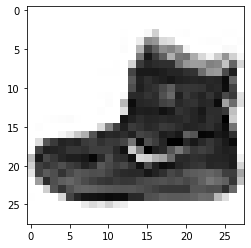

In [6]:
plt.imshow(train_images[0], cmap = "Greys", interpolation = "nearest")

In [7]:
# BUILD THE NEURAL NETWORK

# SET UP THE LAYERS
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation = "relu"),
                          keras.layers.Dense(10)])

''' Flatten layer -- takes the array, which is currently in the shape (28,28), and flattens it into one long array of shape (1, 784)
    First Dense layer -- contains 128 fully connected nodes
    Second Dense layer -- this layer returns a logit array of length 10
    Each dense layer contains a score that the image belongs to one of the 10 classes '''

model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

''' loss -- measures how accurate the model is during training. We want this function to be minimized
          SparseCategoricalCrossentropy -- calculates the crossentropy between the labels and the predictions,
                                           use this when you have more than two categories to predict
    optimizer -- determines how to model will be updated based on the loss function and the data it sees
    metrics -- attribute used to monitor the training and testing steps '''

' loss -- measures how accurate the model is during training. We want this function to be minimized\n          SparseCategoricalCrossentropy -- calculates the crossentropy between the labels and the predictions,\n                                           use this when you have more than two categories to predict\n    optimizer -- determines how to model will be updated based on the loss function and the data it sees\n    metrics -- attribute used to monitor the training and testing steps '

In [18]:
# TRAIN THE MODEL
# 50 epochs may be too much, accuracy does not go up too much after 15-20 epochs

model.fit(train_images, train_labels, epochs = 20, batch_size = 200)

Epoch 1/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1415 - accuracy: 0.9482
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1353 - accuracy: 0.9505
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1331 - accuracy: 0.9518
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1320 - accuracy: 0.9520
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1311 - accuracy: 0.9525
Epoch 6/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1302 - accuracy: 0.9524
Epoch 7/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1284 - accuracy: 0.9525
Epoch 8/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1270 - accuracy: 0.9539
Epoch 9/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1257 - accuracy: 0.9539
Epoch 10/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1254 - accuracy: 0.9546

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# FIND THE ACCURACY WHEN USING THE TESTING DATA
# COMPARE THIS TO TRAINING ACCURACY TO SEE IF OVERFITTING HAS OCCURRED

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print("\nTest Accuracy = ", test_accuracy * 100)

313/313 - 0s - loss: 0.3956 - accuracy: 0.8929

Test Accuracy =  89.28999900817871


In [11]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

''' This softmax layer takes the logits that the original model outputs and converts
    them into probabilities which are much easier to understand and interpret '''

' This softmax layer takes the logits that the original model outputs and converts\n    them into probabilities which are much easier to understand and interpret '

In [12]:
predictions = probability_model.predict(test_images)

In [13]:
# VIEW THE FIRST PREDICITION JUST TO VIEW WHAT THE OUTPUT IS
predictions[0]

''' returns an array of 10 different probabilities, one for each potential category '''

' returns an array of 10 different probabilities, one for each potential category '

In [14]:
# argmax finds the index of the highest prediction value
# check with the actual label to see how this prediction was
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])

  plt.imshow(img, cmap = "Greys")

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], # 1. display the predicted class
                                     100 * np.max(predictions_array), # 2. display the confidence of the prediction
                                     class_names[true_label], # in parenthesis, display the actual class label
                                     color = color)) # if the prediction is correct, the color is green. Wrong predictions are red

In [16]:
def plot_value_array(i, predicitons_array, true_label):
  # assign the true label
  true_label = true_label[i]
  # get rid of the grid of the plot
  plt.grid(False)
  # set the ticks of the x-axis to be the number of classes we are predicting
  plt.xticks(range(10))
  # get rid of the y ticks
  plt.yticks([])
  # set up the bar plot, the x values are 0-9 and the y values are the values that appear in the prediction array
  thisplot = plt.bar(range(10), predicitons_array)
  # set the limit of the y axis to be between 0 and 1
  plt.ylim(0,1)
  # assign the predicted label to a name 
  predicted_label = np.argmax(predicitons_array)

  # set the colors of the two special cases in our bar plot
  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("green")

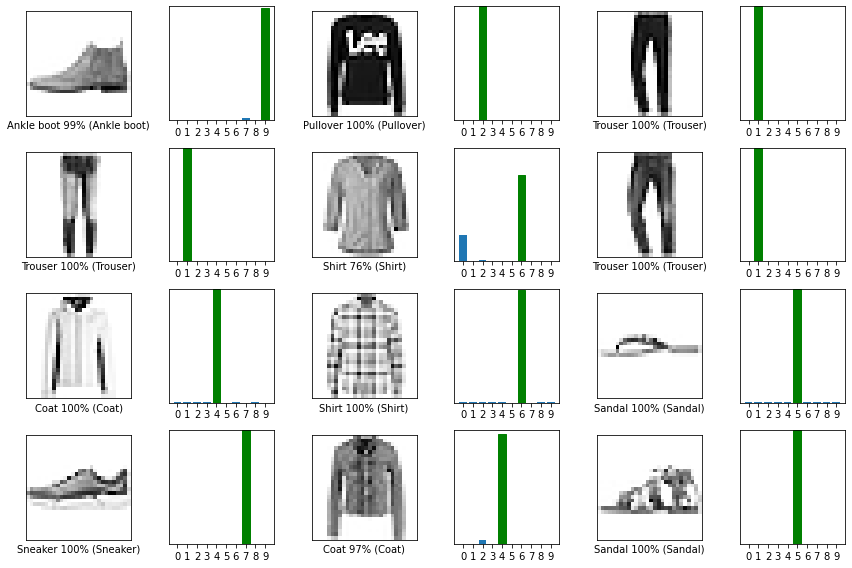

In [17]:
num_rows = 4
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()